<a href="https://colab.research.google.com/github/Meera-Krishna/CSE-316---Intelligent-CPU-Scheduler-SimulatorSc/blob/Meera-Krishna-patch-1/OScode_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the number of processes: 6
Enter arrival time for process P1: 0
Enter burst time for process P1: 4
Enter arrival time for process P2: 1
Enter burst time for process P2: 5
Enter arrival time for process P3: 2
Enter burst time for process P3: 2
Enter arrival time for process P4: 3
Enter burst time for process P4: 1
Enter arrival time for process P5: 4
Enter burst time for process P5: 6
Enter arrival time for process P6: 6
Enter burst time for process P6: 3
Choose a scheduling algorithm (FCFS, SJF-P, SJF-NP, Priority-P, Priority-NP, RR): RR
Enter time quantum: 2
Processes	Arrival Time	Burst Time	Waiting Time	Turnaround Time
1		0		4		4		8
2		1		5		12		17
3		2		2		2		4
4		3		1		5		6
5		4		6		11		17
6		6		3		10		13

Average Waiting Time: 7.333333333333333
Average Turnaround Time: 10.833333333333334
Waiting Times: [4, 12, 2, 5, 11, 10]
Turnaround Times: [8, 17, 4, 6, 17, 13]
Average Waiting Time: 7.33
Average Turnaround Time: 10.83


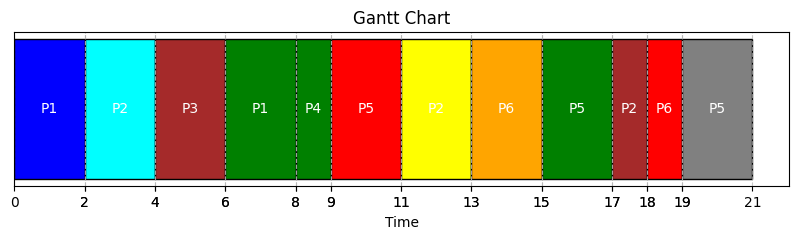

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

def get_processes():
    num_processes = int(input("Enter the number of processes: "))
    processes = []
    for i in range(num_processes):
        arrival_time = int(input(f"Enter arrival time for process P{i+1}: "))
        burst_time = int(input(f"Enter burst time for process P{i+1}: "))
        processes.append([i + 1, arrival_time, burst_time, 0])  # [PID, arrival_time, burst_time, priority]
    return processes

def fcfs(processes):
    processes.sort(key=lambda x: x[1])
    n = len(processes)
    completion_times = []
    waiting_times = []
    turnaround_times = []
    gantt_chart = []

    current_time = 0
    for p in processes:
        if current_time < p[1]:
            current_time = p[1]
        start_time = current_time
        completion_time = current_time + p[2]
        turnaround_time = completion_time - p[1]
        waiting_time = turnaround_time - p[2]

        gantt_chart.append((p[0], start_time, completion_time))

        completion_times.append(completion_time)
        turnaround_times.append(turnaround_time)
        waiting_times.append(waiting_time)

        current_time = completion_time

    avg_waiting_time = sum(waiting_times) / n
    avg_turnaround_time = sum(turnaround_times) / n
    avg_completion_time = sum(completion_times) / n

    return waiting_times, turnaround_times, completion_times, gantt_chart, avg_waiting_time, avg_turnaround_time, avg_completion_time
import matplotlib.pyplot as plt
import random

def sjf_non_preemptive(processes):
    n = len(processes)
    start_times = [0] * n
    completion_times = [0] * n
    waiting_times = [0] * n
    turnaround_times = [0] * n
    gantt_chart = []
    available_processes = []
    completed = [False] * n
    current_time = 0
    first_process = None  # Track the first executed process

    while not all(completed):
        available_processes = [p for i, p in enumerate(processes) if p[1] <= current_time and not completed[i]]
        if available_processes:
            shortest_job = min(available_processes, key=lambda x: x[2])
            index = processes.index(shortest_job)
            start_times[index] = current_time
            completion_times[index] = current_time + shortest_job[2]
            turnaround_times[index] = completion_times[index] - shortest_job[1]
            waiting_times[index] = turnaround_times[index] - shortest_job[2]
            current_time = completion_times[index]
            completed[index] = True
            gantt_chart.append((shortest_job[0], start_times[index], completion_times[index]))

            if first_process is None:
                first_process = shortest_job[0]  # Label the first executed process

        else:
            current_time += 1

    return waiting_times, turnaround_times, gantt_chart, first_process


def sjf_preemptive(processes):
    n = len(processes)
    remaining_burst = [p[2] for p in processes]
    start_times = [-1] * n
    completion_times = [0] * n
    waiting_times = [0] * n
    turnaround_times = [0] * n
    gantt_chart = []
    current_time = 0
    completed = 0
    first_process = None  # Track the first executed process

    while completed != n:
        shortest = -1
        shortest_burst = float('inf')
        for i in range(n):
            if processes[i][1] <= current_time and remaining_burst[i] > 0 and remaining_burst[i] < shortest_burst:
                shortest = i
                shortest_burst = remaining_burst[i]

        if shortest == -1:
            current_time += 1
        else:
            if start_times[shortest] == -1:
                start_times[shortest] = current_time
                if first_process is None:
                    first_process = processes[shortest][0]  # Label the first executed process

            remaining_burst[shortest] -= 1
            current_time += 1

            if remaining_burst[shortest] == 0:
                completed += 1
                completion_times[shortest] = current_time
                turnaround_times[shortest] = completion_times[shortest] - processes[shortest][1]
                waiting_times[shortest] = turnaround_times[shortest] - processes[shortest][2]
                gantt_chart.append((processes[shortest][0], start_times[shortest], completion_times[shortest]))

    return waiting_times, turnaround_times, gantt_chart, first_process


def plot_gantt_chart(gantt_chart, first_process, title="Gantt Chart"):
    fig, ax = plt.subplots(figsize=(10, 2))
    colors = ["red", "blue", "green", "purple", "orange", "brown", "pink", "gray", "cyan", "yellow"]

    for i, (pid, start, end) in enumerate(gantt_chart):
        color = random.choice(colors)
        ax.barh(y=0, width=end-start, left=start, height=0.5, color=color, edgecolor='black')
        ax.text((start + end) / 2, 0, f"P{pid}", ha='center', va='center', color='white', fontsize=10)

        if pid == first_process:
            ax.text(start, 0.3, "First Executed", ha='center', fontsize=10, color='black', fontweight='bold')

    ax.set_yticks([])
    ax.set_xticks([start for _, start, _ in gantt_chart] + [end for _, _, end in gantt_chart])
    ax.set_xticklabels([str(start) for _, start, _ in gantt_chart] + [str(end) for _, _, end in gantt_chart])
    ax.set_xlabel("Time")
    ax.set_title(title)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
def round_robin(processes, time_quantum):
    n = len(processes)
    remaining_burst = [p[2] for p in processes]
    start_times = [-1] * n
    completion_times = [0] * n
    waiting_times = [0] * n
    turnaround_times = [0] * n
    gantt_chart = []
    current_time = 0
    queue = []
    completed = 0

    # Add processes that arrive at time 0
    for i in range(n):
        if processes[i][1] == 0:
            queue.append(i)

    while completed != n:
        if not queue:
            # Advance time to next process arrival
            min_arrival = min(p[1] for p in processes if remaining_burst[processes.index(p)] > 0)
            current_time = max(current_time, min_arrival)
            for i in range(n):
                if processes[i][1] <= current_time and remaining_burst[i] > 0 and i not in queue:
                    queue.append(i)

        i = queue.pop(0)

        if start_times[i] == -1:
            start_times[i] = current_time

        execution_time = min(time_quantum, remaining_burst[i])
        gantt_chart.append((processes[i][0], current_time, current_time + execution_time))
        current_time += execution_time
        remaining_burst[i] -= execution_time

        # Add newly arrived processes to queue
        for j in range(n):
            if processes[j][1] <= current_time and remaining_burst[j] > 0 and j not in queue and j != i:
                queue.append(j)

        if remaining_burst[i] > 0:
            queue.append(i)
        else:
            completion_times[i] = current_time
            turnaround_times[i] = completion_times[i] - processes[i][1]
            waiting_times[i] = turnaround_times[i] - processes[i][2]
            completed += 1

    # Print results
    print("Processes\tArrival Time\tBurst Time\tWaiting Time\tTurnaround Time")
    for i in range(n):
        print(f"{processes[i][0]}\t\t{processes[i][1]}\t\t{processes[i][2]}\t\t{waiting_times[i]}\t\t{turnaround_times[i]}")

    print("\nAverage Waiting Time:", sum(waiting_times) / n)
    print("Average Turnaround Time:", sum(turnaround_times) / n)

    return waiting_times, turnaround_times, gantt_chart
2
def get_priority_processes(processes):
    for process in processes:
        priority = int(input(f"Enter priority for process P{process[0]}: "))
        process[3] = priority
    return processes

def priority_non_preemptive(processes):
    """Priority (non-preemptive) scheduling."""
    n = len(processes)
    start_times = [0] * n
    completion_times = [0] * n
    waiting_times = [0] * n
    turnaround_times = [0] * n
    gantt_chart = []
    completed = [False] * n
    current_time = 0

    while not all(completed):
        available_processes = [p for i, p in enumerate(processes) if p[1] <= current_time and not completed[i]]
        if available_processes:
            # Sort by priority first, then by arrival time
            highest_priority_job = min(available_processes, key=lambda x: (x[3], x[1]))
            index = processes.index(highest_priority_job)
            start_times[index] = current_time
            completion_times[index] = current_time + highest_priority_job[2]
            turnaround_times[index] = completion_times[index] - highest_priority_job[1]
            waiting_times[index] = turnaround_times[index] - highest_priority_job[2]
            current_time = completion_times[index]
            completed[index] = True
            gantt_chart.append((highest_priority_job[0], start_times[index], completion_times[index]))
        else:
            current_time += 1

    return waiting_times, turnaround_times, gantt_chart

def priority_preemptive(processes):
    n = len(processes)
    remaining_burst = [p[2] for p in processes]
    completion_times = [0] * n
    waiting_times = [0] * n
    turnaround_times = [0] * n
    gantt_chart = []
    current_time = 0
    completed = 0
    current_process = -1  # Tracks the currently running process
    start_time = -1  # Tracks the start time of a process execution block

    while completed != n:
        available_processes = [p for p in processes if p[1] <= current_time and remaining_burst[processes.index(p)] > 0]

        if available_processes:
            highest_priority_process = min(available_processes, key=lambda x: (x[3], x[1]))
            index = processes.index(highest_priority_process)

            if current_process != highest_priority_process[0]:
                # If process changes, store previous block in Gantt chart
                if current_process != -1:
                    gantt_chart.append((current_process, start_time, current_time))

                # Start a new block for the new process
                current_process = highest_priority_process[0]
                start_time = current_time

            remaining_burst[index] -= 1
            current_time += 1

            if remaining_burst[index] == 0:
                completed += 1
                completion_times[index] = current_time
                turnaround_times[index] = completion_times[index] - processes[index][1]
                waiting_times[index] = turnaround_times[index] - processes[index][2]
        else:
            # If no process is available, CPU is idle
            if current_process != -1:
                gantt_chart.append((current_process, start_time, current_time))
                current_process = -1  # Mark CPU as idle

            current_time += 1

    # Add the last execution block if needed
    if current_process != -1:
        gantt_chart.append((current_process, start_time, current_time))

    return waiting_times, turnaround_times, gantt_chart


def main():
    processes = get_processes()


    scheduling_choice = input("Choose a scheduling algorithm (FCFS, SJF-P, SJF-NP, Priority-P, Priority-NP, RR): ").strip().lower()

    if scheduling_choice == "fcfs":
        wt, tat, ct, gantt, avg_wt, avg_tat, avg_ct = fcfs(processes)
        print("Waiting Times:", wt)
        print("Turnaround Times:", tat)
        print("Completion Times:", ct)
        print(f"Average Waiting Time: {avg_wt:.2f}")
        print(f"Average Turnaround Time: {avg_tat:.2f}")
        print(f"Average Completion Time: {avg_ct:.2f}")
        plot_gantt_chart(gantt, None) # Pass None for first_process in FCFS
    elif scheduling_choice in ("sjf-p", "sjf-np", "priority-p", "priority-np", "rr"):
        if scheduling_choice == "sjf-p":
            wt, tat, gantt, first_process = sjf_preemptive(processes) # Assign the fourth return value
        elif scheduling_choice == "sjf-np":
            wt, tat, gantt, first_process = sjf_non_preemptive(processes) # Assign the fourth return value
        elif scheduling_choice == "priority-p":
            processes = get_priority_processes(processes)  # Get priorities for each process
            high_priority = input("Does a higher number indicate a higher priority? (yes/no): ").strip().lower()
            wt, tat, gantt = priority_preemptive(processes)
        elif scheduling_choice == "priority-np":
            processes = get_priority_processes(processes)  # Get priorities for each process
            high_priority = input("Does a higher number indicate a higher priority? (yes/no): ").strip().lower()
            wt, tat, gantt = priority_non_preemptive(processes)
        elif scheduling_choice == "rr":
            time_quantum = int(input("Enter time quantum: "))
            # The round_robin function only needs processes and time_quantum
            wt, tat, gantt = round_robin(processes, time_quantum)

        print("Waiting Times:", wt)
        print("Turnaround Times:", tat)
        avg_wt = sum(wt) / len(wt)
        avg_tat = sum(tat) / len(tat)
        print(f"Average Waiting Time: {avg_wt:.2f}")
        print(f"Average Turnaround Time: {avg_tat:.2f}")

        # Pass first_process to plot_gantt_chart if available, otherwise None
        if scheduling_choice in ("sjf-p", "sjf-np"):
            plot_gantt_chart(gantt, first_process)
        else:
            plot_gantt_chart(gantt, None)
    else:
        print("Invalid choice.")
        return

if __name__ == "__main__":
    main()
